In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

C:\Users\User\AppData\Local\Temp\ipykernel_20364\3118121047.py:14: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


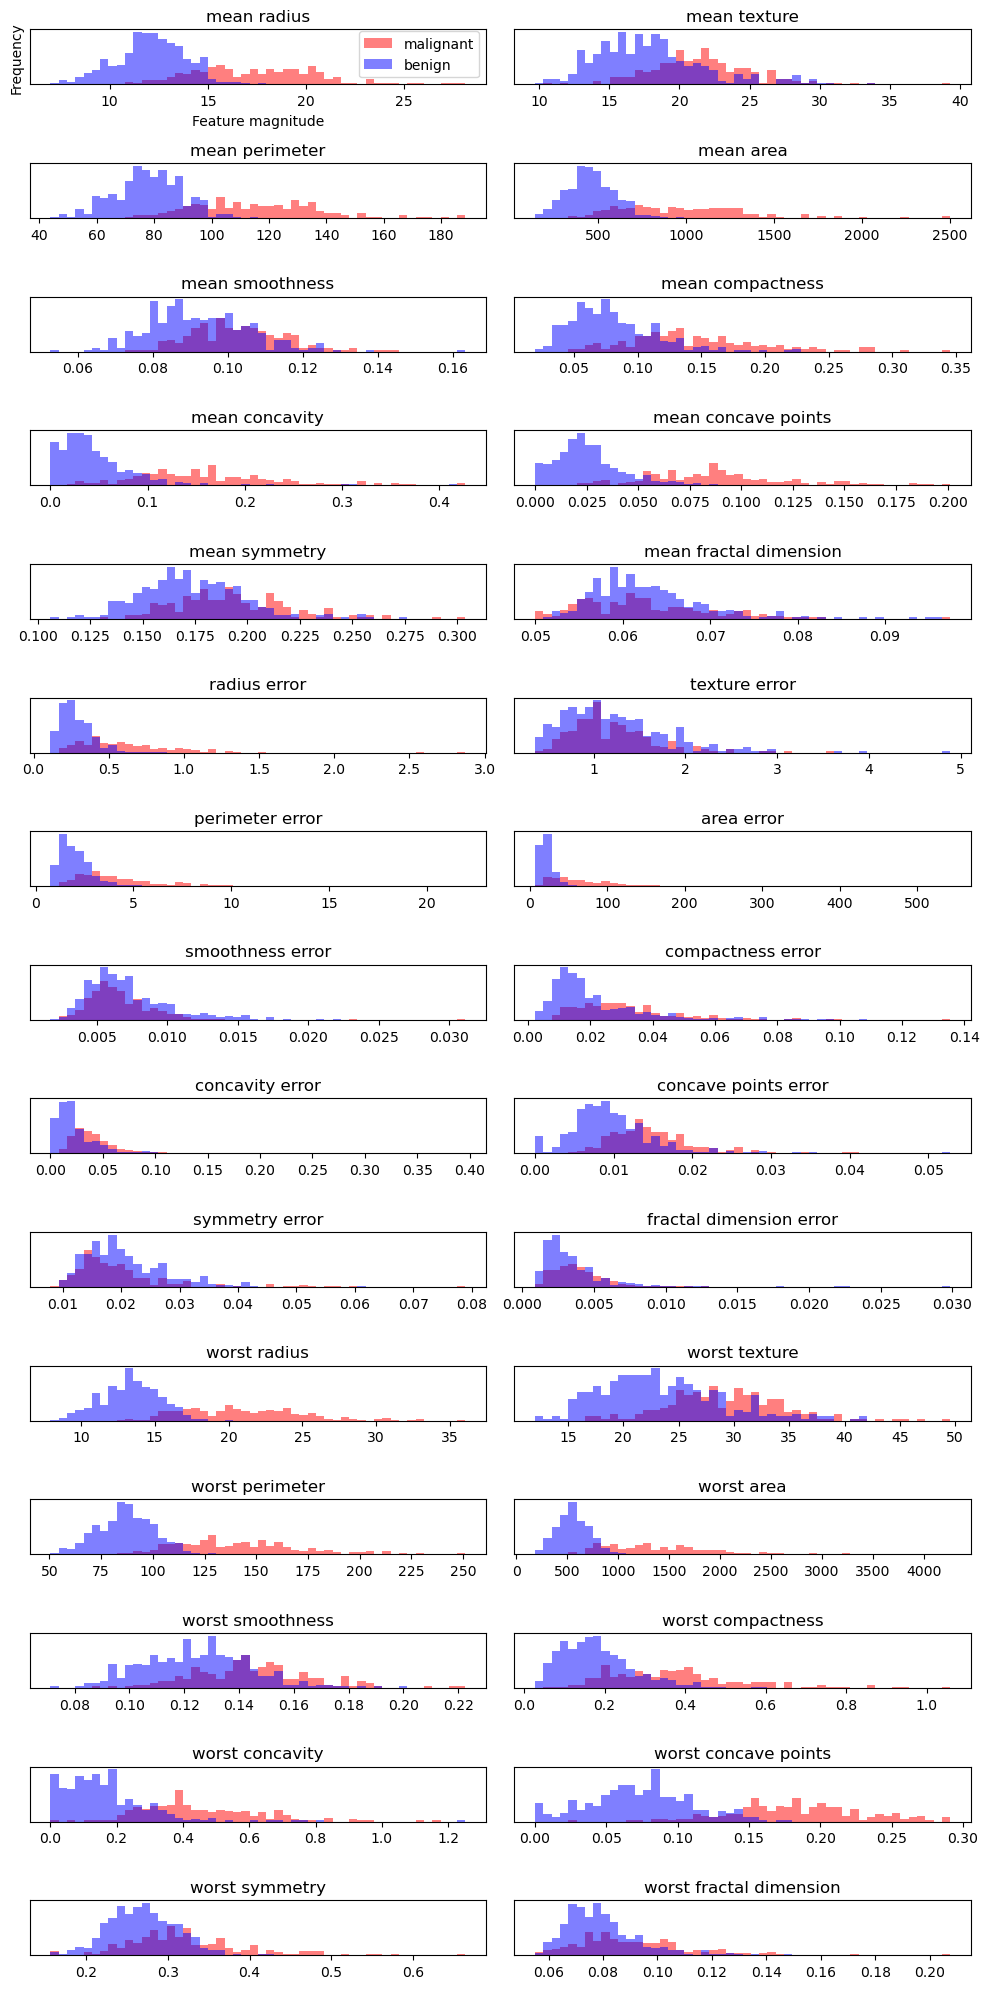

In [3]:
fig, axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i ], bins=bins, color='red', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='blue', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    ax[0].set_xlabel("Feature magnitude")
    ax[0].set_ylabel("Frequency")
    ax[0].legend(["malignant","benign"], loc="best")
    fig.tight_layout()

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca= pca.transform(X_scaled)
print("Original Shape: {}".format(str(X_scaled.shape)))
print("Reduced Shape: {}".format(str(X_pca.shape)))

Original Shape: (569, 30)
Reduced Shape: (569, 2)


Text(0, 0.5, 'Second principal component')

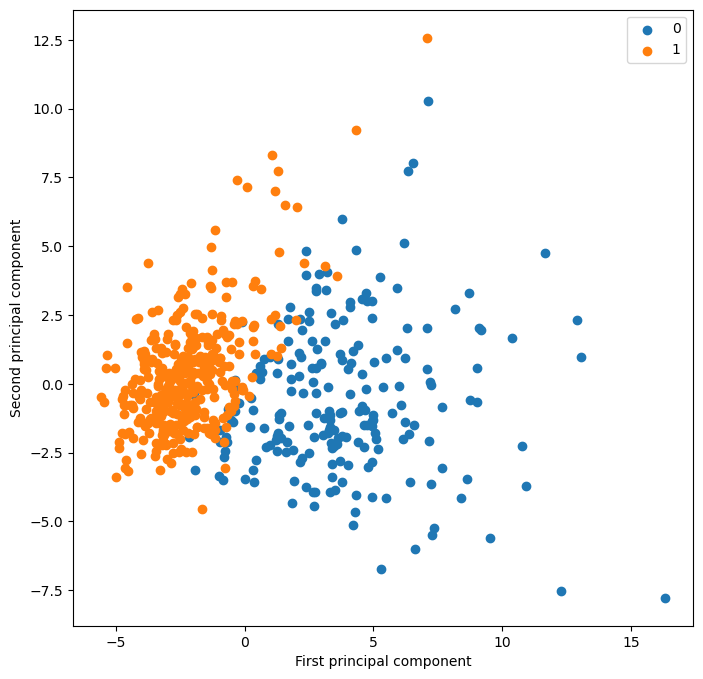

In [6]:
y=cancer.target
plt.figure(figsize=(8,8,))
for label in np.unique(y):
    plt.scatter(X_pca[y==label, 0], X_pca[y==label,1],label=label)
plt.legend()
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [7]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as splt

In [9]:
X=X_scaled
y=cancer.target

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [11]:
accuracy_score(y_test,y_pred)

0.9385964912280702

In [12]:
splt.plot_confusion_matrix(model,x_test,y_test,cmap='Dark2')

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

In [13]:
X_new=X_pca
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [14]:
accuracy_score(y_test,y_pred)

0.9385964912280702

In [15]:
splt.plot_confusion_matrix(model,x_test,y_test,cmap='Dark2')

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

Text(0, 0.5, 'Cumulative explained variance')

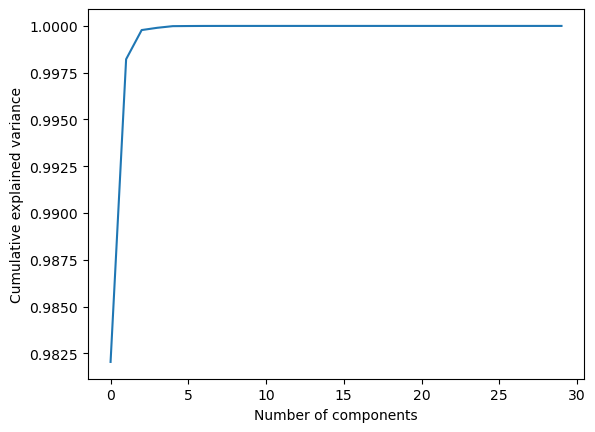

In [18]:
pca = PCA().fit(cancer.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [19]:
print('Variance Captured by First 2 Principal Components: ',
     pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])

Variance Captured by First 2 Principal Components:  0.9982211613741726


In [20]:
print("Variance explained by 30 Components",sum(pca.explained_variance_ratio_))

Variance explained by 30 Components 0.9999999999999998
